#

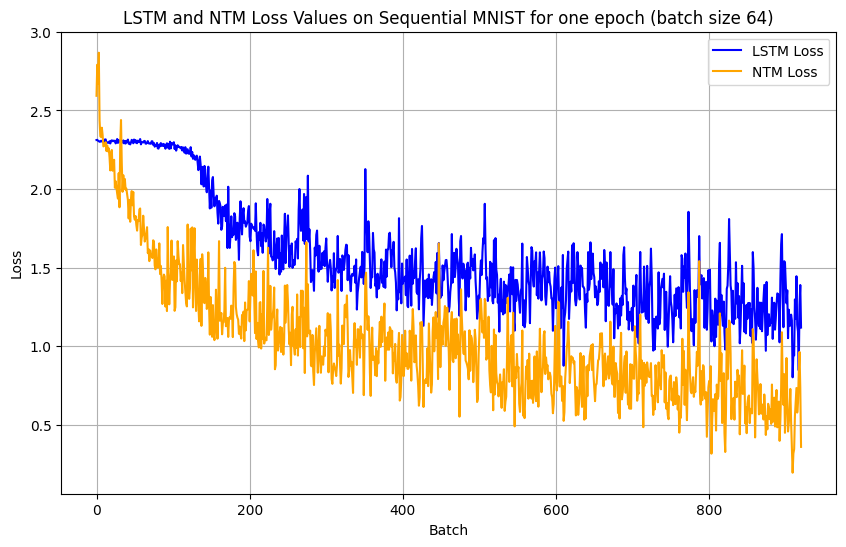

In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the loss data from the JSON file
with open('checkpoints/seq-mnist-lstm-seq_mnist-task-1000-batch-920-2024-06-0918:21:02.700840.json') as f:
    data_lstm = json.load(f)

with open('checkpoints/seq_mnist-task-1000-batch-920-2024-06-0917:28:33.951658.json') as f:
    data_ntm = json.load(f)

loss_lstm = data_lstm['loss']
loss_ntm = data_ntm['loss']

# Define the window size for the rolling average
window_size = 400

# Calculate the rolling average
loss_avg = np.convolve(loss, np.ones(window_size)/window_size, mode='valid')

# Adjust x to match the length of loss_avg
x = np.arange(len(loss))
x_avg = x[:len(loss_avg)]

# plot both lstm and ntm losses on squential mnist
plt.figure(figsize=(10, 6))
plt.plot(x, loss_lstm, label='LSTM Loss', color='blue')
plt.plot(x, loss_ntm, label='NTM Loss', color='orange')
plt.title('LSTM and NTM Loss Values on Sequential MNIST for one epoch (batch size 64)')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
import torch
import torch.nn as nn


class LSTMWithLinearLayer(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super().__init__()

        self._lstm = nn.LSTM(input_size, hidden_size, batch_first=False)
        self._linear = nn.Linear(hidden_size, output_size)

    def forward(self, x_t: torch.Tensor):
        _, (h_t, _) = self._lstm(x_t)

        print(h_t.shape)
        return self._linear(h_t)

In [23]:
net = LSTMWithLinearLayer(1, 128, 10)

input = torch.randn(50_000, 784, 1)

class data_set(torch.utils.data.Dataset):
    def __init__(self, input):
        self.input = input

    def __len__(self):
        return len(self.input)

    def __getitem__(self, idx):
        return self.input[idx]

data_set = data_set(input)
dataloader = torch.utils.data.DataLoader(data_set, batch_size=32)

from tqdm import tqdm
for batch in tqdm(dataloader):
    print(batch.shape, batch.permute(1, 0, 2).shape)
    output = net(batch.permute(1, 0, 2))
    print(output.squeeze().shape)
    break


  0%|          | 0/1563 [00:00<?, ?it/s]

torch.Size([32, 784, 1]) torch.Size([784, 32, 1])


  0%|          | 0/1563 [00:00<?, ?it/s]

torch.Size([1, 32, 128])
torch.Size([32, 10])
